**Day 30 Lecture 2 Assignment**

In this assignment, we will learn about random forests. We will use the google play store dataset loaded below.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
reviews = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/googleplaystore.csv')

reviews.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In this assignment, you will work more independently. Perform the following steps:

1. Select which columns are best suited to predict whether the rating is above 4.5
2. Process the data (including transforming to the correct column type, removing missing values, creating dummy variables, and removing irrelevant variables)
3. Create a random forest model and evaluate
4. Using grid search cross validation, tweak the parameters to produce a better performing model
5. Show and discuss your results

Good luck!

In [3]:
#new column stating wether App is best or not best based on rating > 4.5
# example fifa['RankingTier'] = fifa['Overall'].apply(lambda x: 'High' if x > 75 else ('Low' if x < 65 else 'Middle'))
reviews['New Rating'] = reviews['Rating'].apply(lambda x: 1 if x > 4.5 else 0)

In [4]:
#Select which columns are best suited to predict whether the rating is above 4.5
#Category, Reviews, Type, Price, Content Rating
reviews2 = reviews[['New Rating','Category', 'Reviews', 'Type', 'Price', 'Content Rating']]
reviews2 = reviews2.dropna()
reviews2.head()

,New Rating,Category,Reviews,Type,Price,Content Rating
0,0,ART_AND_DESIGN,159,Free,0,Everyone
1,0,ART_AND_DESIGN,967,Free,0,Everyone
2,1,ART_AND_DESIGN,87510,Free,0,Everyone
3,0,ART_AND_DESIGN,215644,Free,0,Teen
4,0,ART_AND_DESIGN,967,Free,0,Everyone


In [5]:
reviews2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10839 entries, 0 to 10840
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   New Rating      10839 non-null  int64 
 1   Category        10839 non-null  object
 2   Reviews         10839 non-null  object
 3   Type            10839 non-null  object
 4   Price           10839 non-null  object
 5   Content Rating  10839 non-null  object
dtypes: int64(1), object(5)
memory usage: 592.8+ KB


In [6]:
#turning reviews and price into numeric
reviews2.Price = reviews2.Price.replace('[\$,]', '', regex=True).astype(float)
reviews2['Reviews'] = reviews2['Reviews'].astype(int)


In [7]:
reviews2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10839 entries, 0 to 10840
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   New Rating      10839 non-null  int64  
 1   Category        10839 non-null  object 
 2   Reviews         10839 non-null  int64  
 3   Type            10839 non-null  object 
 4   Price           10839 non-null  float64
 5   Content Rating  10839 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 592.8+ KB


In [8]:
#splitting data target variable = New Rating
from sklearn.model_selection import train_test_split
X = reviews2.drop(['New Rating'], axis=1)
y = reviews2['New Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# quantile transformer
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer()
X_train_t = qt.fit_transform(X_train)

In [10]:
#category encoder for cat columns
from category_encoders.leave_one_out import LeaveOneOutEncoder
encoder = LeaveOneOutEncoder(cols=['Category', 'Type', 'Content Rating'])
encoder.fit(X_train, y_train)
X_train_loo = encoder.transform(X_train)

In [11]:
X_train_loo

,Category,Reviews,Type,Price,Content Rating
7350,0.135135,2543,0.170295,0.00,0.182742
10710,0.223602,153176,0.170295,0.00,0.182742
9177,0.092683,97,0.170295,0.00,0.182742
710,0.308943,56065,0.170295,0.00,0.182742
3297,0.147692,60571,0.170295,0.00,0.182742
...,...,...,...,...,...
102,0.243902,32090,0.170295,0.00,0.182742
6160,0.238806,276,0.170295,0.00,0.182742
8702,0.159664,93,0.170295,0.00,0.168955
6766,0.147692,251,0.273734,0.99,0.182742


In [12]:
#create random forest model
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(X_train_loo, y_train)

RandomForestClassifier()

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

trees = 50

params = {'max_depth': [20, 30, 40], 'min_samples_split':[50, 75, 100]}

forest_reg = RandomForestRegressor(n_estimators=trees, max_features='sqrt')

forest_grid = GridSearchCV(forest_reg, param_grid=params, scoring='neg_root_mean_squared_error', cv=5)

forest_grid.fit(X_train_loo, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_features='sqrt',
                                             n_estimators=50),
             param_grid={'max_depth': [20, 30, 40],
                         'min_samples_split': [50, 75, 100]},
             scoring='neg_root_mean_squared_error')

In [15]:
X_test_loo = encoder.transform(X_test)

In [17]:
from sklearn.metrics import mean_squared_error

y_train_forest_pred = forest_grid.predict(X_train_loo)
y_forest_pred = forest_grid.predict(X_test_loo)

rmse_forest_train = mean_squared_error(y_train, y_train_forest_pred, squared=False)
rmse_forest_test = mean_squared_error(y_test, y_forest_pred, squared=False)

print('Train RMSE: {:.4f}'.format(rmse_forest_train))
print('Test RMSE: {:.4f}'.format(rmse_forest_test))

Train RMSE: 0.3469
Test RMSE: 0.3650


In [22]:
print('Forest Model\nMax Depth {}\nMin Sample Split {}\n'.format(
    forest_grid.best_estimator_.max_depth, forest_grid.best_estimator_.min_samples_split))

forest_importance = pd.Series(forest.feature_importances_, X_train_loo.columns).sort_values(ascending=False)
print('Forest model feature importances: \n{}'.format(forest_importance))


Forest Model
Max Depth 20
Min Sample Split 75

Forest model feature importances: 
Reviews           0.811581
Category          0.127765
Price             0.032370
Content Rating    0.024082
Type              0.004202
dtype: float64


In [25]:
X_test_loo = encoder.transform(X_test)
y_pred_test = forest.predict(X_test_loo)

from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred_test)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1793
           1       0.36      0.31      0.34       375

    accuracy                           0.79      2168
   macro avg       0.61      0.60      0.60      2168
weighted avg       0.77      0.79      0.78      2168



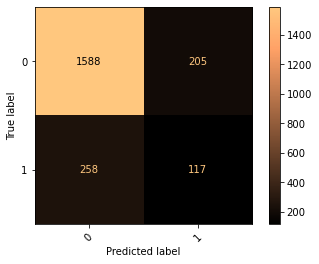

In [26]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(forest, X_test_loo, y_test, cmap='copper', xticks_rotation=45)
plt.show()

Area under the ROC curve: 0.599


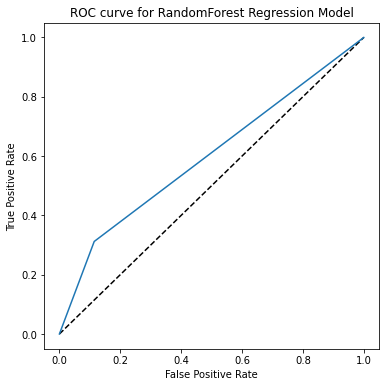

In [32]:
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score
#preds = forest_grid.predict_proba(X_test_loo)[:,1]
fpr1, tpr1, thresholds = roc_curve(y_test, y_pred_test)
auc = roc_auc_score(y_test, y_pred_test)
print('Area under the ROC curve: {:.3f}'.format(auc))

plt.figure(figsize=(6,6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1, tpr1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for RandomForest Regression Model')
plt.show()